In [ ]:
from py3dcore_h4c.gui.utils.helioviewer import get_helioviewer_client


In [6]:
import sunpy
from sunpy.time import parse_time
import sunpy.data.sample
import sunpy.map
from sunpy.net.helioviewer import HelioviewerClient
from sunpy.map import Map
from sunpy.coordinates import frames
import datetime
import astropy
import astropy.units as u

t1 = datetime.datetime(2020,4,15,6)
hv = HelioviewerClient()

file = hv.download_jp2(t1, observatory="SOHO", instrument="LASCO", detector='C3',  measurement="white-light") 


        Use hvpy - https://hvpy.readthedocs.io/en/stable instead. [sunpy.util.logger]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


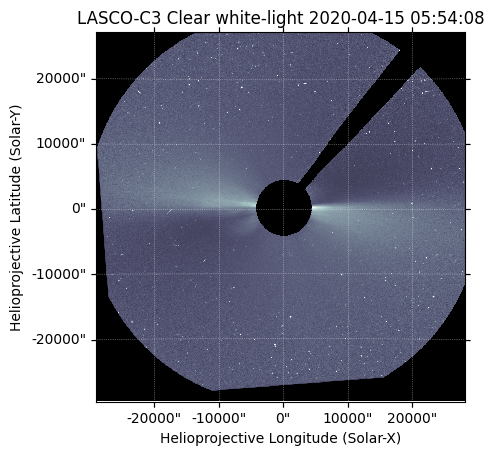

In [7]:
Map(file).plot()

In [19]:
%load_ext autoreload
%autoreload 2

import datetime
import py3dcore_h4c.gui.guiold as go

t_snap = datetime.datetime(2020,4,15,6)
dt_0 = t_snap - datetime.timedelta(hours = 15)

mesh = go.py3dcore_mesh(dt_0, t_snap)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[0.00e+00 1.50e+02 0.00e+00 0.00e+00 2.00e-01 3.00e+00 1.50e+01 8.00e+02
  1.00e+02 1.14e+00 1.64e+00 2.50e+01 1.00e+00 5.00e+02]]


In [21]:
import datetime
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas, \
    NavigationToolbar2QT as NavigationToolbar
from matplotlib.gridspec import GridSpec
from matplotlib import colors
import matplotlib.pyplot as plt

from py3dcore_h4c.gui.gui import load_image

straight_vertices, front_vertices, circle_vertices = 10, 10, 20

spacecraft = ['STA', 'SOHO']
date = datetime.datetime(2020,4,15,6)
runndiff = False
detector_stereo = 'COR2'
detector_soho = 'C2'

figure = Figure(figsize=(5 * len(spacecraft), 5))
#canvas = FigureCanvas(figure)
spec = GridSpec(ncols=len(spacecraft), nrows=1, figure=figure)
axes = []
images = []
mesh_plots = []
for i, sc in enumerate(spacecraft):
    detector = detector_stereo if sc in ['STA', 'STB'] else detector_soho
    image = load_image(sc, detector, date, runndiff)
    images.append(image)

    ax = figure.add_subplot(spec[:, i], projection=image)
    axes.append(ax)
    image.plot(axes=ax, cmap='Greys_r', norm=colors.Normalize(vmin=-30, vmax=30) if runndiff else None)
    
    if i == len(spacecraft) - 1:
        # for last plot: move labels to the right
        ax.coords[1].set_ticks_position('r')
        ax.coords[1].set_ticklabel_position('r')
        ax.coords[1].set_axislabel_position('r')
    figure.canvas.draw()
    #figure.tight_layout()

draw_mode='grid'
if draw_mode == 'grid':
    mesh2 = mesh.reshape((front_vertices + straight_vertices) * 2 - 3, circle_vertices).T.flatten()
    mesh = concatenate([mesh, mesh2])
    
for i, (image, ax) in enumerate(zip(images,axes)):
    if len(mesh_plots) <= i:
        # new plot
        style = {
            'grid': '-',
            'point cloud': '.'
        }[draw_mode]
        params = {
            'grid': dict(lw=0.5),
            'point cloud': dict(ms=2)
        }[draw_mode]
        p = ax.plot_coord(mesh, style, color='blue', scalex=False, scaley=False, **params)[0]
        mesh_plots.append(p)
    else:
        # update plot
        p = self._mesh_plots[i]

        frame0 = mesh.frame.transform_to(image.coordinate_frame)
        xdata = frame0.spherical.lon.to_value(units.deg)
        ydata = frame0.spherical.lat.to_value(units.deg)
        p.set_xdata(xdata)
        p.set_ydata(ydata)
        ax.draw_artist(p)

fig.canvas.draw()

# dummy plot to show figure

dummy = plt.figure()
new_manager = dummy.canvas.manager
new_manager.canvas.figure = figure
figure.set_canvas(new_manager.canvas)
figure.show()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

ValueError: cannot reshape array of size 4107 into shape (37,20)

datetime.datetime(2020, 4, 15, 6, 0)